In [2]:
%matplotlib inline

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# preprocessing

In [58]:
sns.set(rc={'figure.figsize': (9, 6)})

In [35]:
data = pd.read_csv('event_data_train.csv')
data.head(15)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
5,32811,1434340895,passed,17632
6,32929,1434340921,discovered,17632
7,32929,1434340921,viewed,17632
8,32929,1434340939,started_attempt,17632
9,32929,1434340944,passed,17632


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480703 entries, 0 to 3480702
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   step_id    int64 
 1   timestamp  int64 
 2   action     object
 3   user_id    int64 
dtypes: int64(3), object(1)
memory usage: 106.2+ MB


In [43]:
data['date'] = pd.to_datetime(data.timestamp, unit='s')

In [37]:
data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [28]:
data.groupby('step_id', as_index=False).step_id.agg({'count_step_id': 'count'}) \
    .sort_values(by='count_step_id', ascending=False).reset_index()

,index,step_id,count_step_id
0,60,32927,60553
1,58,32815,51189
2,64,32950,50847
3,56,32812,48570
4,61,32929,46478
...,...,...,...
193,159,33914,6530
194,191,34051,6314
195,189,34049,6307
196,192,34052,6159


In [20]:
data.groupby(['user_id', 'step_id'], as_index=False).agg(num_steps=('step_id', 'count')) \
    .sort_values(by='num_steps', ascending=True)

,user_id,step_id,num_steps
353182,13606,31972,1
64132,2311,31978,1
64133,2311,32219,1
64134,2311,120745,1
513083,19847,32174,1
...,...,...,...
539522,20907,32202,523
539610,20907,33675,531
539542,20907,32950,546
344565,13268,31977,563


In [31]:
data.groupby('action', as_index=False).agg(num_step_id=('step_id',  'count'))

,action,num_step_id
0,discovered,689495
1,passed,650331
2,started_attempt,310047
3,viewed,1830830


In [44]:
data['day'] = data.date.dt.date
data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [55]:
data.resample('3M', on='date').agg({'action': 'count'})

,action
date,
2015-06-30,293168
2015-09-30,437304
2015-12-31,159275
2016-03-31,174111
2016-06-30,151865
2016-09-30,240816
2016-12-31,267220
2017-03-31,256299
2017-06-30,293002


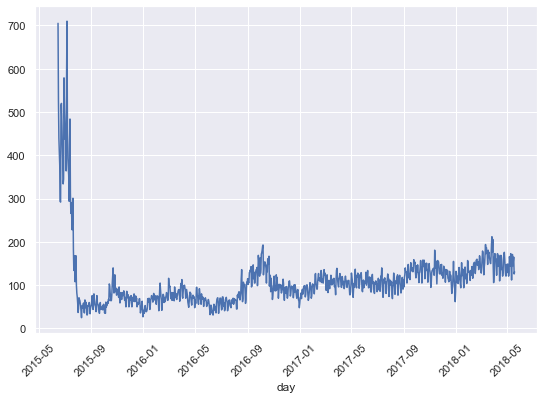

In [67]:
data.groupby('day') \
    .user_id.nunique().plot()
plt.xticks(rotation=45); # Rotates X-Axis Ticks by 45-degrees


<AxesSubplot:>

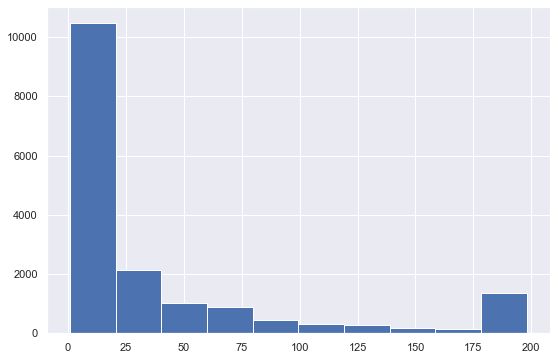

In [72]:
data.query('action == "passed"') \
    .groupby('user_id', as_index=False) \
    .agg(passed_step=('step_id', 'count')) \
    .passed_step.hist()

In [269]:
action_pivot = \
data.pivot_table(index='user_id', 
                 columns='action', 
                 values='step_id',
                 aggfunc='count',
                 fill_value=0) \
    .rename_axis(None, axis=1)

In [264]:
action_pivot.columns.name = None

In [270]:
action_pivot

,discovered,passed,started_attempt,viewed
user_id,,,,
1,1,0,0,1
2,9,9,2,10
3,91,87,30,192
5,11,11,4,12
7,1,1,0,1
...,...,...,...,...
26790,8,8,1,9
26793,1,0,1,1
26794,69,69,34,180


In [232]:
action_pivot.index.name

'user_id'

In [199]:
action_pivot.index.name = None

In [233]:
action_pivot

,discovered,passed,started_attempt,viewed
user_id,,,,
1,1,0,0,1
2,9,9,2,10
3,91,87,30,192
5,11,11,4,12
7,1,1,0,1
...,...,...,...,...
26790,8,8,1,9
26793,1,0,1,1
26794,69,69,34,180


In [228]:
action_pivot.reset_index()

,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1
...,...,...,...,...,...
19229,26790,8,8,1,9
19230,26793,1,0,1,1
19231,26794,69,69,34,180
19232,26797,10,10,2,13


## submission data

In [76]:
submissions_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip',compression ='zip')

In [77]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [91]:
tries = \
submissions_data.groupby(['user_id', 'step_id'], as_index=False) \
                .agg(num_attempts=('submission_status', 'count')) \
                .sort_values('num_attempts', ascending=False)

tries.query('num_attempts >= 0') \
     .groupby('step_id', as_index=False) \
     .agg(high_step_fails=('num_attempts', 'sum')) \
     .sort_values('high_step_fails', ascending=False)

,step_id,high_step_fails
4,31978,22178
11,32031,18221
19,32202,16950
1,31972,15394
12,32075,14534
...,...,...
67,33874,2319
23,32763,2301
70,33984,2286
59,33681,2280


In [93]:
data.groupby('step_id').user_id.count()

step_id
30456     22768
30462     12069
30465      9870
31955     31882
31956     34336
          ...  
109765     4152
120744    19619
120745    27517
158432    11683
158433     9097
Name: user_id, Length: 198, dtype: int64

In [92]:
submissions_data.groupby('step_id').user_id.count()

step_id
31971     13150
31972     15394
31976     12517
31977     13257
31978     22178
          ...  
33992      3432
33994      3473
33998      2326
34041      2773
120745     5815
Name: user_id, Length: 76, dtype: int64

In [95]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')
submissions_data['day'] = submissions_data.date.dt.date
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [149]:
subm = \
submissions_data.pivot_table(values='step_id', 
                             index='user_id',
                             columns='submission_status',
                             aggfunc='count') \
                .fillna(0)

## drop-out users

In [275]:
data = data.rename_axis(None, axis=1)

In [284]:
gap_df = data[['user_id', 'day', 'timestamp']]

In [286]:
gap_data = gap_df.drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id').timestamp.agg(list).apply(np.diff).values

In [294]:
gap_data_days = pd.Series(np.concatenate(gap_data, axis=0) / (24 * 60 * 60))

<AxesSubplot:>

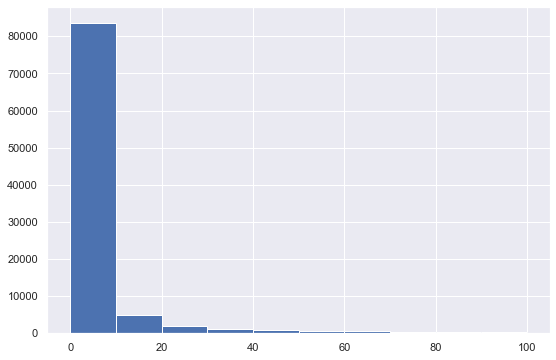

In [298]:
gap_data_days[gap_data_days < 100].hist()

In [300]:
gap_data_days.quantile(0.95)

59.760440972222156

# Karpov id

### event data

In [301]:
data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [333]:
users_finished = \
data.query('action == "passed"') \
    .groupby(['user_id'], as_index=False) \
    .agg(passed_action=('action', 'count')).sort_values(by='passed_action', ascending=False)

users_finished = users_finished.query('passed_action == 198')

In [372]:
users_finished.query('user_id == 19805')

,user_id,passed_action
12757,19805,198


In [328]:
data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


In [334]:
users_finished.user_id.values.shape

(394,)

In [335]:
passed_data = \
data[data['user_id'].isin(users_finished.user_id.values)]

In [336]:
passed_data

,step_id,timestamp,action,user_id,date,day
505,32815,1434344946,discovered,11670,2015-06-15 05:09:06,2015-06-15
506,32815,1434344946,passed,11670,2015-06-15 05:09:06,2015-06-15
507,32815,1434344946,viewed,11670,2015-06-15 05:09:06,2015-06-15
508,32811,1434344952,discovered,11670,2015-06-15 05:09:12,2015-06-15
509,32811,1434344952,viewed,11670,2015-06-15 05:09:12,2015-06-15
...,...,...,...,...,...,...
3479638,34026,1526756031,viewed,23194,2018-05-19 18:53:51,2018-05-19
3479642,34026,1526756104,viewed,23194,2018-05-19 18:55:04,2018-05-19
3479644,33901,1526756106,viewed,23194,2018-05-19 18:55:06,2018-05-19
3479652,33901,1526756195,viewed,23194,2018-05-19 18:56:35,2018-05-19


In [337]:
users_min_max = \
passed_data.groupby('user_id').agg(min_stamp=('timestamp', 'min'), max_stamp=('timestamp', 'max'))

In [338]:
users_min_max

,min_stamp,max_stamp
user_id,,
22,1498561010,1507142631
30,1467307716,1510574287
39,1456943480,1502712399
80,1469080119,1489798576
149,1513511240,1524591350
...,...,...
26270,1479924874,1490548403
26304,1518782324,1520247170
26610,1493838797,1523209444


In [344]:
users_min_max['delta'] = (users_min_max.max_stamp - users_min_max.min_stamp) / 3600 / 24

In [393]:
data.groupby('user_id').agg({'day': 'nunique'}).idxmax()

day    1046
dtype: int64

In [391]:
submissions_data.groupby('user_id').agg({'day': 'nunique'}).sort_values(by='day')

,day
user_id,
2,1
13917,1
13913,1
13906,1
13905,1
...,...
17825,50
3572,51
6662,51


In [378]:
data.head()

,step_id,timestamp,action,user_id,date,day,month,year_month
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,6,2015-06
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,6,2015-06
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,6,2015-06
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,6,2015-06
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,6,2015-06


In [377]:
data['year_month'] = data.date.dt.to_period('M')

In [384]:
data.drop_duplicates(subset=['user_id', 'year_month']) \
    .groupby('user_id').agg(appear=('year_month', 'count')) \
    .sort_values(by='appear', ascending=False)

,appear
user_id,
1046,36
1078,28
21969,24
7596,21
24752,20
...,...
10791,1
10797,1
10799,1


### subm data

In [348]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [356]:
submissions_data.step_id.nunique()

76

In [361]:
corr_subm = \
submissions_data.query('submission_status == "correct"') \
    .drop_duplicates(subset=['user_id', 'step_id']) \
    .groupby(['user_id'], as_index=False) \
    .agg(cor_sub=('submission_status', 'count')) \
    .query('cor_sub == 76')
corr_subm

,user_id,cor_sub
4,16,76
5,22,76
8,30,76
13,39,76
21,60,76
...,...,...
9724,26617,76
9725,26619,76
9750,26697,76
9783,26779,76


In [362]:
passed_data = \
submissions_data[submissions_data['user_id'].isin(corr_subm.user_id.values)]

In [363]:
users_min_max = \
passed_data.groupby('user_id').agg(min_stamp=('timestamp', 'min'), max_stamp=('timestamp', 'max'))

In [367]:
users_min_max['delta'] = (users_min_max.max_stamp - users_min_max.min_stamp) / 3600

In [368]:
users_min_max.sort_values(by='delta')

,min_stamp,max_stamp,delta
user_id,,,
19805,1509741306,1509744516,0.891667
6203,1492678635,1492726715,13.355556
1074,1515937849,1516132014,53.934722
10923,1510578872,1510814460,65.441111
21321,1475438525,1475698459,72.203889
...,...,...,...
2444,1437679998,1516002956,21756.377222
25398,1434820974,1513261066,21788.914444
12839,1434386649,1518722110,23426.516944


In [370]:
corr_subm.query('user_id == 19805')

,user_id,cor_sub
7250,19805,76


In [385]:
sub = submissions_data.copy()

In [387]:
new_df

submission_status,correct,wrong
user_id,,
2,2.0,NaN
3,29.0,23.0
5,2.0,2.0
8,9.0,21.0
14,NaN,1.0
...,...,...
26787,3.0,NaN
26790,1.0,NaN
26794,33.0,9.0


In [386]:
new_df = sub.pivot_table(index='user_id', columns='submission_status',values='step_id', aggfunc='count')
new_df[new_df['correct'] == new_df['correct'].max()]

submission_status,correct,wrong
user_id,,
1046,421.0,513.0


In [251]:
df = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6]}, index=['g', 'h', 'j'])
df.index.name = 'char'
df

,a,b
char,,
g,1,4
h,2,5
j,3,6


In [252]:
df = df.reset_index()

In [253]:
df

,char,a,b
0,g,1,4
1,h,2,5
2,j,3,6
